In [19]:
# The hope is this dataset does not have the same issues as the previous dataset did

import json
import os
import pprint

def load_recinfo(path):
    """
    Load and parse an Age of Empires II .recinfo file.
    These are JSON-formatted files with a custom extension.
    """
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

def summarize_match(data):
    """
    Print a quick summary of the match info.
    """
    version = data.get("version", "unknown")
    winner = data.get("winner", "unknown")
    n_states = len(data.get("gameStates", []))
    print(f"Version: {version}")
    print(f"Winner: {winner}")
    print(f"Snapshots: {n_states}")
    if n_states > 0:
        players = data["gameStates"][0]["playerMain"]["players"]
        print(f"Players: {[p['name'] for p in players]}")

def extract_player_stat_progression(data, stat_type, stat, player_index=0):
    """
    Return time series of the stat for one player.
    """
    
    progression = []
    for state in data["gameStates"]:
        player = state["playerMain"]["players"][player_index]
        #times.append(state["time"])
        if stat_type=="main":
            gos = player[stat]
            progression.append(gos)
        if stat_type=="buildingSummary" or stat_type=="unitSummary":
            gos = player["gameObjectSummary"][stat_type]
            progression.append(gos[stat])
        if stat_type=="resources":
            gos = player[stat_type]
            progression.append(gos[stat])
    return progression

if __name__ == "__main__":
    # Example: read a single .recinfo file
    file_path = "aoe2dataset-main\\dataset\\v1\\1v1_arabia_top_players\\part1\\AgeIIDE_Replay_57661929.recinfo"
    if not os.path.exists(file_path):
        print("File not found. Please put the .recinfo file in this directory.")
    else:
        data = load_recinfo(file_path)
        summarize_match(data)

Version: 1.0
Winner: dogao
Snapshots: 54
Players: ['Gaia', 'dogao', 'Dobbs351']


In [20]:
len(data["gameStates"])

54

In [21]:
# the previous data was more on growth rather than were the player was or where it moved. That seems more annoying. So with this data we have location of where we are etc and some territory info. 
# Lets actually have that. And essentially see on top of that info from a player, also incorporate resources, builds, and also where they are like where they move and advance so territorial expansion.

import matplotlib.pyplot as plt

def plot_overlay(series_list, labels=None, player_index=0, xlabel="Snapshot", ylabel="Value"):
    """
    Plot multiple time series overlaid on the same chart.

    Parameters:
        series_list (list of lists): Each inner list is one series (e.g., player resource progression).
        labels (list of str): Optional labels for each series.
        title (str): Title of the plot.
        xlabel (str): X-axis label.
        ylabel (str): Y-axis label.
    """
    plt.figure(figsize=(10, 6))

    n_series = len(series_list)
    if labels is None:
        labels = [f"Series {i+1}" for i in range(n_series)]

    for s, label in zip(series_list, labels):
        plt.plot(range(len(s)), s, linewidth=2, alpha=0.7, label=label)

    plt.title(f"{str(labels)} Progression for Player {player_index}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



In [22]:
food_data_player1 = extract_player_stat_progression(data, "resources", "food", player_index=1)
food_data_player2 = extract_player_stat_progression(data, "resources", "food", player_index=2)

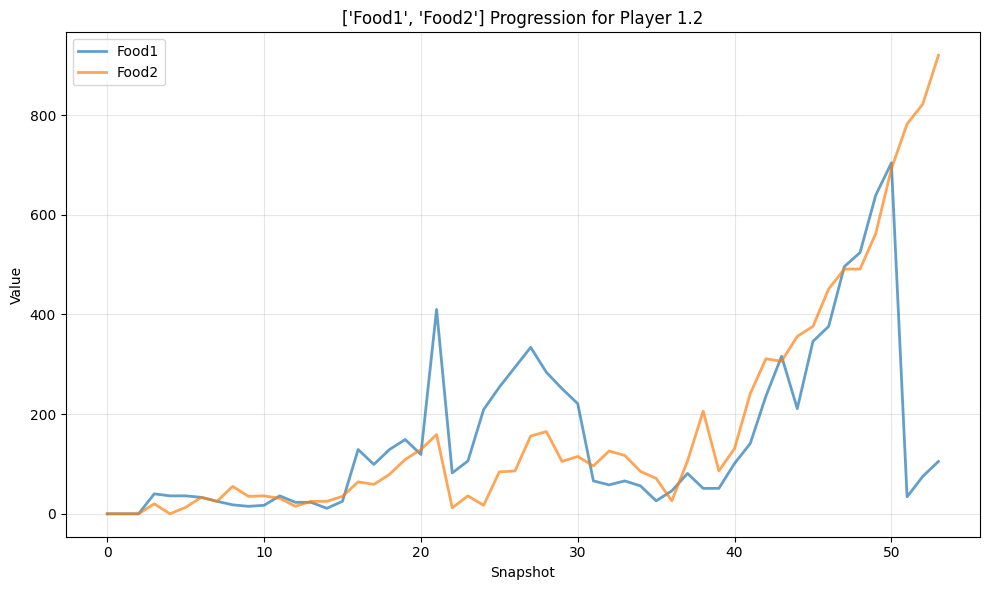

In [23]:
plot_overlay([food_data_player1, food_data_player2], ["Food1", "Food2"], 1.2) # This is exactly what we expect out of a game

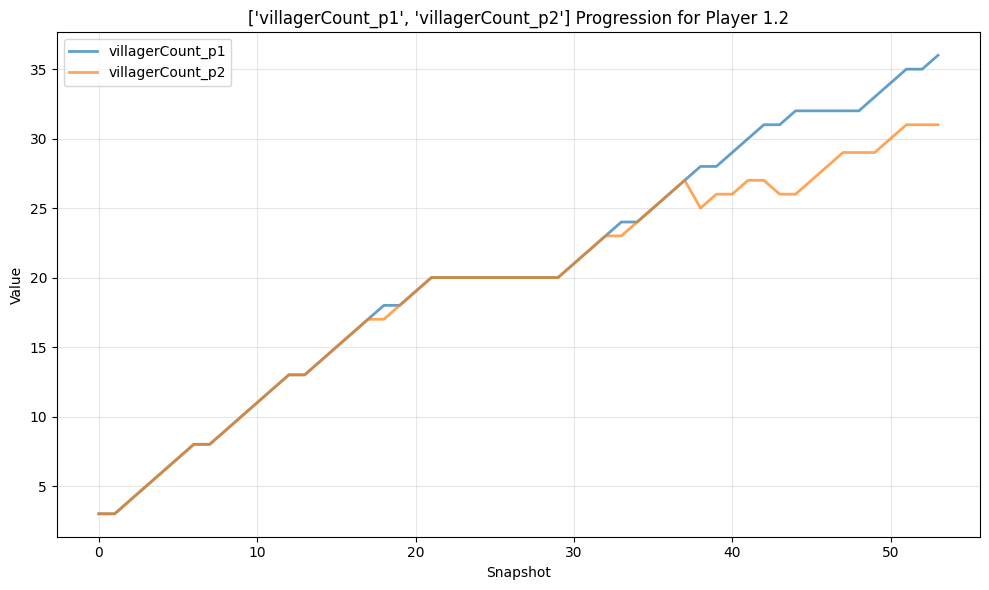

In [24]:
# Lets do villagers!
villagerCount_p1 = extract_player_stat_progression(data, "resources", "villagerCount", player_index=1)
villagerCount_p2 = extract_player_stat_progression(data, "resources", "villagerCount", player_index=2)
plot_overlay([villagerCount_p1, villagerCount_p2], ["villagerCount_p1", "villagerCount_p2"], 1.2)

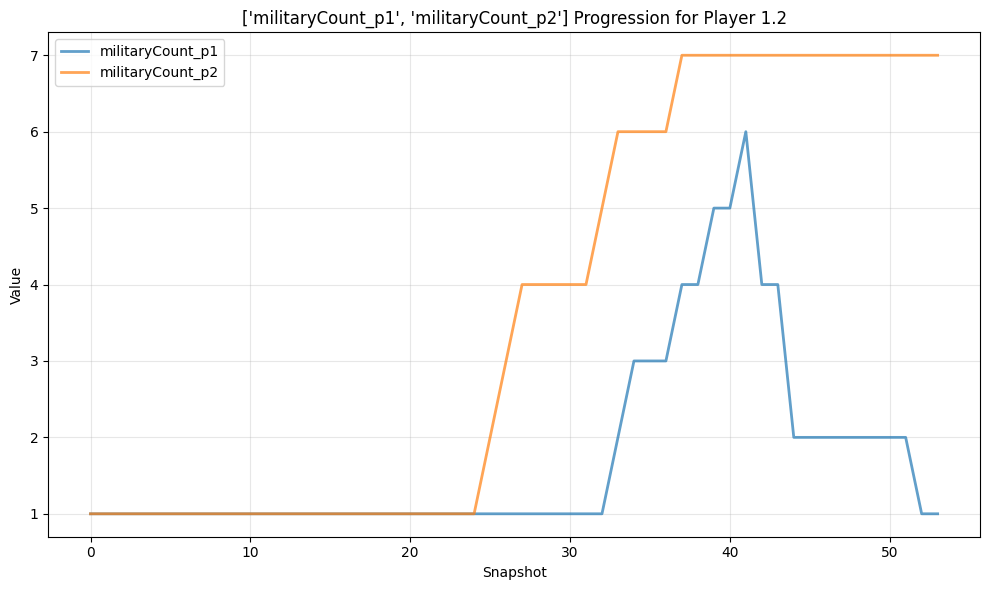

In [25]:
# In here I just overimpose both players data and that helps for a specific variable
variable_to_extract = "militaryCount"
fromWhere = "resources"
p1data = extract_player_stat_progression(data, fromWhere, variable_to_extract, player_index=1)
p2data = extract_player_stat_progression(data, fromWhere, variable_to_extract, player_index=2)
plot_overlay([p1data, p2data], [f"{variable_to_extract}_p1", f"{variable_to_extract}_p2"], 1.2)

In [26]:
# THIS is what we have been looking for. This makes perfect sense. For reference, player 1 won this game. And the data backs that up, as usually at the end of a game there are major battles and militia units die, with the losing party generally
# losing more units or just being worse off

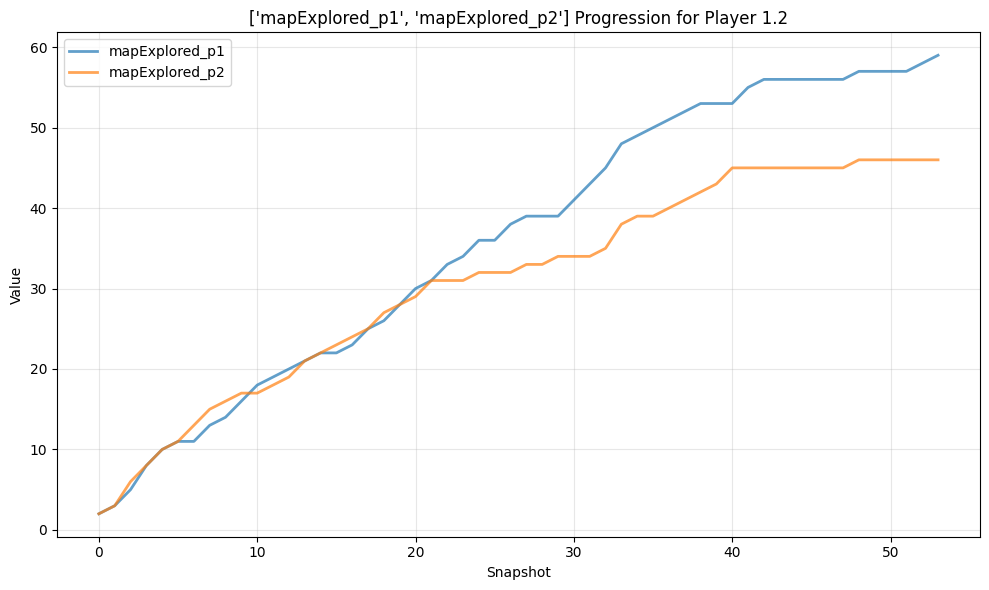

In [27]:
variable_to_extract = "mapExplored"
fromWhere = "resources"
p1data = extract_player_stat_progression(data, fromWhere, variable_to_extract, player_index=1)
p2data = extract_player_stat_progression(data, fromWhere, variable_to_extract, player_index=2)
plot_overlay([p1data, p2data], [f"{variable_to_extract}_p1", f"{variable_to_extract}_p2"], 1.2)